In [146]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
*The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [367]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import itertools
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import graphviz 
from sklearn.tree import export_graphviz
import statsmodels.api as stm
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from treeinterpreter import treeinterpreter as ti
np.random.seed(11)

Ari Horwitz 
Final Project - The Flatiron School

#  KEEPING IT ON THE DL?    
## PREDICTING WHETHER A PITCHER WILL BE INJURED

<img src="https://usatftw.files.wordpress.com/2016/04/410-braves.jpg?w=1000&h=600&crop=1"/>

 <h4><center>Atlanta Braves pitcher Dan Winkler looked at by trainers after injuring his arm on April 10, 2016</center></h4>

The goal of the following report is to predict whether any pitcher in Major League Baseball ('MLB') will be injured in the upcoming season. Predictions are derived from various data sets (including MLB.com, FanGraphs.com, Lahman's Baseball Database and Chadwick Baseball Bureau), and measures the time frame between 2009 and present day. 

In [152]:
# from IPython.display import Image
# Image(filename=cwd + 'injured_pitcher.zip')

In [163]:
cwd = os.getcwd()
dl = pd.read_csv(cwd + ('/cleaned/dl.csv'))
pitches = pd.read_csv(cwd + ('/cleaned/pitches_by_yr.csv'))

In [5]:
# years = pitches['year'].unique()

In [86]:
# hurt =[]
# for yr in years:
#     use = dl[dl['year'] == yr]
#     ouch = len(use['injured'])
# #     print(ouch)
#     hurt.append(ouch)

In [ ]:
## Analyzing from 2009 onward, pitcher injuries are on the rise

# Introductory Problem
*Noting an increase in pitching injuries since 2009, many baseball teams have incorporated a limited pitch count per game to keep pitchers from suffering injuries. Nevertheless, the injuries continues to pile up (as shown below).*

<h4><center>Visual 1: Pitching injuries are on the rise</center></h4>

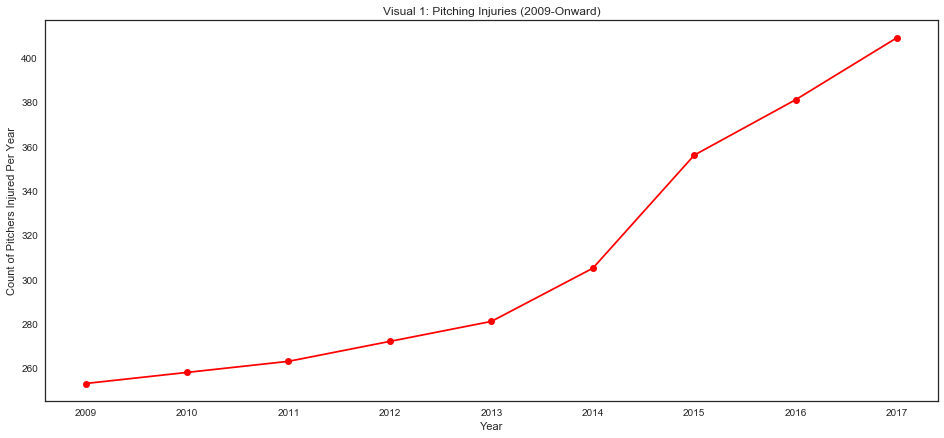

In [153]:

plt.figure(figsize=(16,7))
plt.plot(years, hurt, marker='o', color='r')
# plt.bar(years, hurt, color='red' )
plt.xlabel('Year')
plt.ylabel('Count of Pitchers Injured Per Year')
plt.title('Visual 1: Pitching Injuries (2009-Onward)')
plt.show()

In [87]:
# velo = []
# count = []
# out = []
# rep = []
# for yr in years:
    
#     use = pitches[pitches['year'] == yr]
#     speed = sum(use['avg_velo'])/len(use['avg_velo'])
# #     print(speed)
#     velo.append(speed)
#     tire = sum(use['Pitches'])/len(use['Pitches'])
# #     print(tire)
#     count.append(tire)
#     long = sum(use['IP'])/len(use['IP'])
# #     print(long)
#     out.append(long)
#     dif = sum(use['num_pitches'])/len(use['num_pitches'])
# #     print(dif)
#     rep.append(dif)

<h6><center>Visual 3: Average count of pitches thrown per year is decreasing</center></h6>

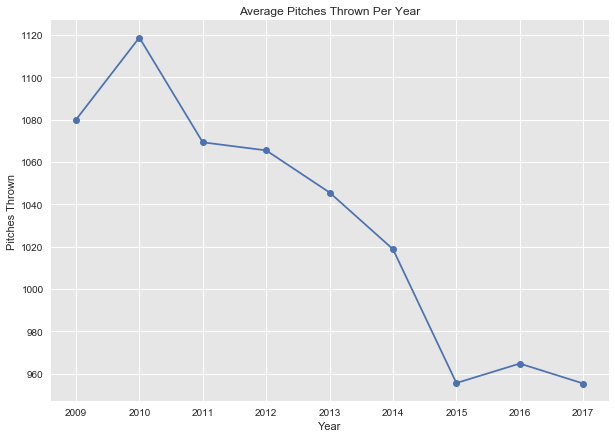

In [358]:

plt.figure(figsize=(10,7))
plt.plot(years, count, marker='o' )
plt.xlabel('Year')
plt.ylabel('Pitches Thrown')
plt.title('Average Pitches Thrown Per Year')
plt.show()

In [360]:
# # fig, axs = plt.subplots(2, 2, figsize=(16,7))
# # axs[0][0].plot(X_train[0])
# # axs[0][1].plot(X_train[1])
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

# ax1.plot(years, velo,  marker='o')
# # ax1.xlabel('Year')
# # ax1.ylabel('Velocity')
# ax1.set_title('Visual 2: Velocity')  # Average Pitch Speed Per Year)
# ax2.plot(years, count, marker='o' )
# # ax2.xlabel('Year')
# # ax2.ylabel('Pitches Thrown')
# ax2.set_title('Average Pitches Thrown Per Year')
# plt.show()

# HYPOTHESIS
*Despite the limited pitch count, pitchers are still suffering injuries at an increased rate. This is due to their desire to throw out faster and stronger pitches.* 

<h6><center>Visual 2: Average speed per pitch is increasing</center></h6>    

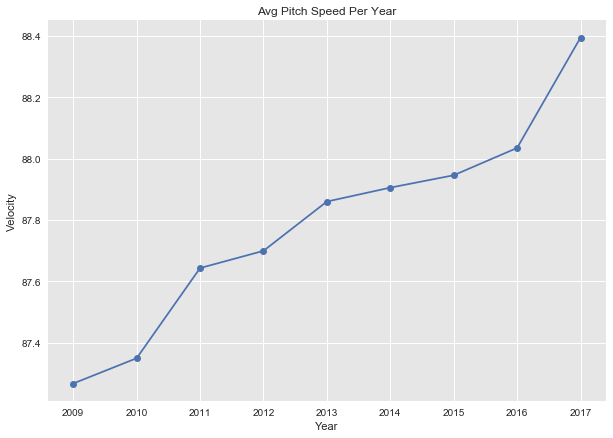

In [359]:
plt.figure(figsize=(10,7))
plt.plot(years, velo,  marker='o')
plt.xlabel('Year')
plt.ylabel('Velocity')
plt.title('Avg Pitch Speed Per Year')
plt.show()

In [109]:
# plt.plot(years, count, marker='o' )
# plt.xlabel('Year')
# plt.ylabel('Pitches Thrown')
# plt.title('Avg Pitches Thrown Per Year')
# plt.show()

In [94]:
# plt.plot(years, out, marker='o')
# plt.xlabel('Year')
# plt.ylabel('Innings Pitched')
# plt.title('Avg Innings Pitched Per Year')
# plt.show()

In [88]:
# plt.scatter(pitches.Age, pitches.avg_velo)

In [235]:
pitchers = pd.read_csv(cwd + ('/cleaned/fixed_complete_list.csv'))

In [236]:
#important features from models in modeling 
# pitchers = pitchers.reindex(columns = ['Age', 'in_majors', 'lgID', 'weight',
#        'height', 'throws', 'W', 'L', 'G', 'GS', 'IP', 'H', 'HR', 'BAOpp',
#        'ERA', 'SF', 'GIDP', 'Balls', 'Strikes', 'Pitches', 'FB%', 'SL%', 'CT%',
#        'CB%', 'CH%', 'num_pitches', 'avg_velo', 'previous', 'injured'])
pitchers = pitchers[pitchers['throws'] != 'S']
pitchers.replace({'no' : 0, 'yes' : 1, 'NL': 0, 'AL':1, 'R':0, 'L': 1}, inplace=True)
# pitchers = pitchers.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [89]:
# plt.scatter(pitchers.weight, pitchers.avg_velo)

<img src='https://www.topvelocity.net/wp-content/uploads/2011/12/pitching-injury.jpg'/>

## MODEL PREPARATION
*The collected data highlights characteristics which may determine whether the pitcher is at risk for injury. Various correlations, Decision Trees and Feature Importance views are displayed below to help determine which redundant/non-important features can be removed.*

<h4><center>Visual 4: Correlations between features (to identify which are redundant and do not need to be tested for the injury hypothesis)</center></h4>

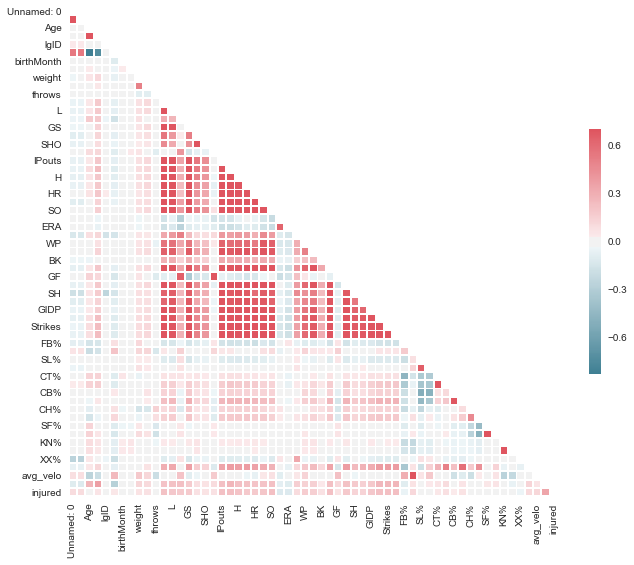

In [129]:
sns.set(style="white")


# Compute the correlation matrix
corr = pitchers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5})

In [237]:
pitchers.drop(columns= ['Unnamed: 0', 'Name', 'year','birthYear', 'birthMonth', 'birthDay', 'birthState','bats', 'birthCity','W', 'L','GS', 'IP', 'HR','Balls', 'Strikes','SF', 'GIDP', 'CG', 'SHO', 'SV', 'IPouts','FBv','SLv',  'CTv',
       'CBv','CHv','SFv','KNv', 'BB', 'SO', 'IBB', 'WP', 'HBP', 'GF','BFP','R', 'SH','ER'], inplace = True)

<h4><center>Visual 5: Outcome of correlation focus (post removal of redundant features)</center></h4>

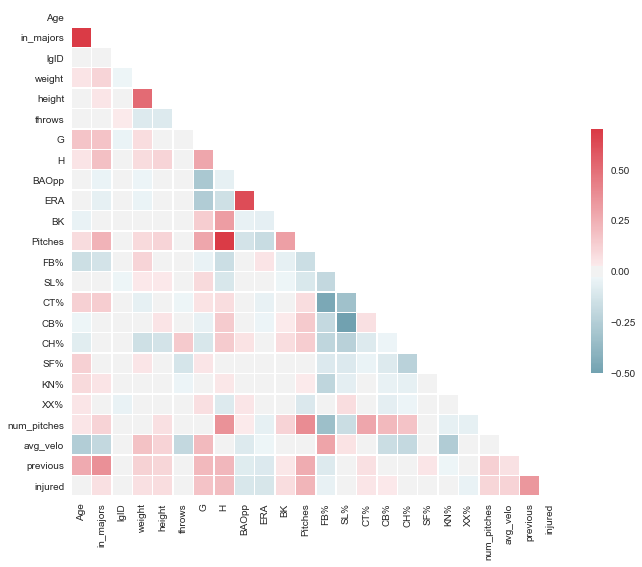

In [145]:
sns.set(style="white")


# Compute the correlation matrix
corr = pitchers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [154]:
def plot_roc_curve(fpr, tpr, model='ROC'):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    print('AUC: {}'.format(metrics.auc(fpr, tpr)))
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve for ' + model)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' #'.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [202]:
pitchers = pd.get_dummies(pitchers)
inj = pitchers.injured
pitchers.drop(columns= ["injured"], axis=1, inplace=True)
X_train, X_test, i_train, i_test = train_test_split(pitchers, inj, test_size = .3)

In [185]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 3,min_samples_split=5) 
dt_cl = tree_clf.fit(X_train, i_train)

<h4><center>Visual 6: Decision Tree run to identify which features are classified as non-important (and thus do not have an impact in determining pitcher injury)</center></h4>

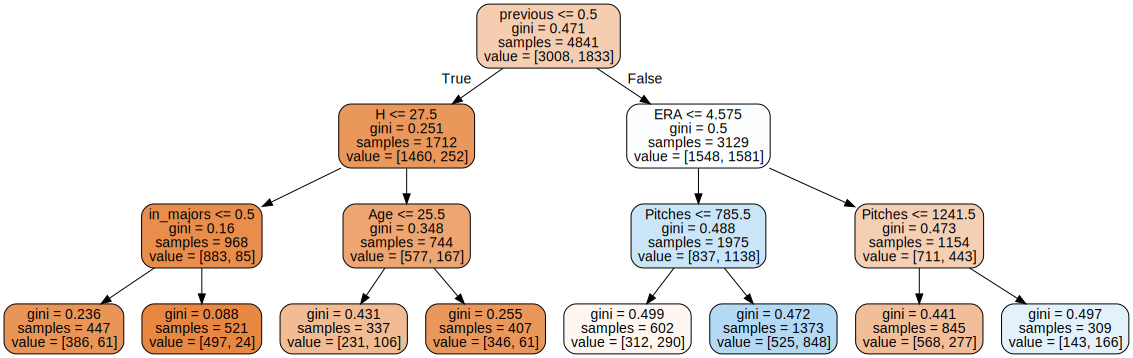

In [187]:
export_graphviz(dt_cl , out_file="mytree.dot", feature_names=X_train.columns , rounded=True, filled= True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<h4><center>Visual 7: Feature Importance view (which provides a clearer visual of the Decision Tree). As shown below, 'Previously Injured' will be dropped from the analysis as it skews the results (causing the model to only focus on this one feature instead of considering the other inputs)</center></h4>

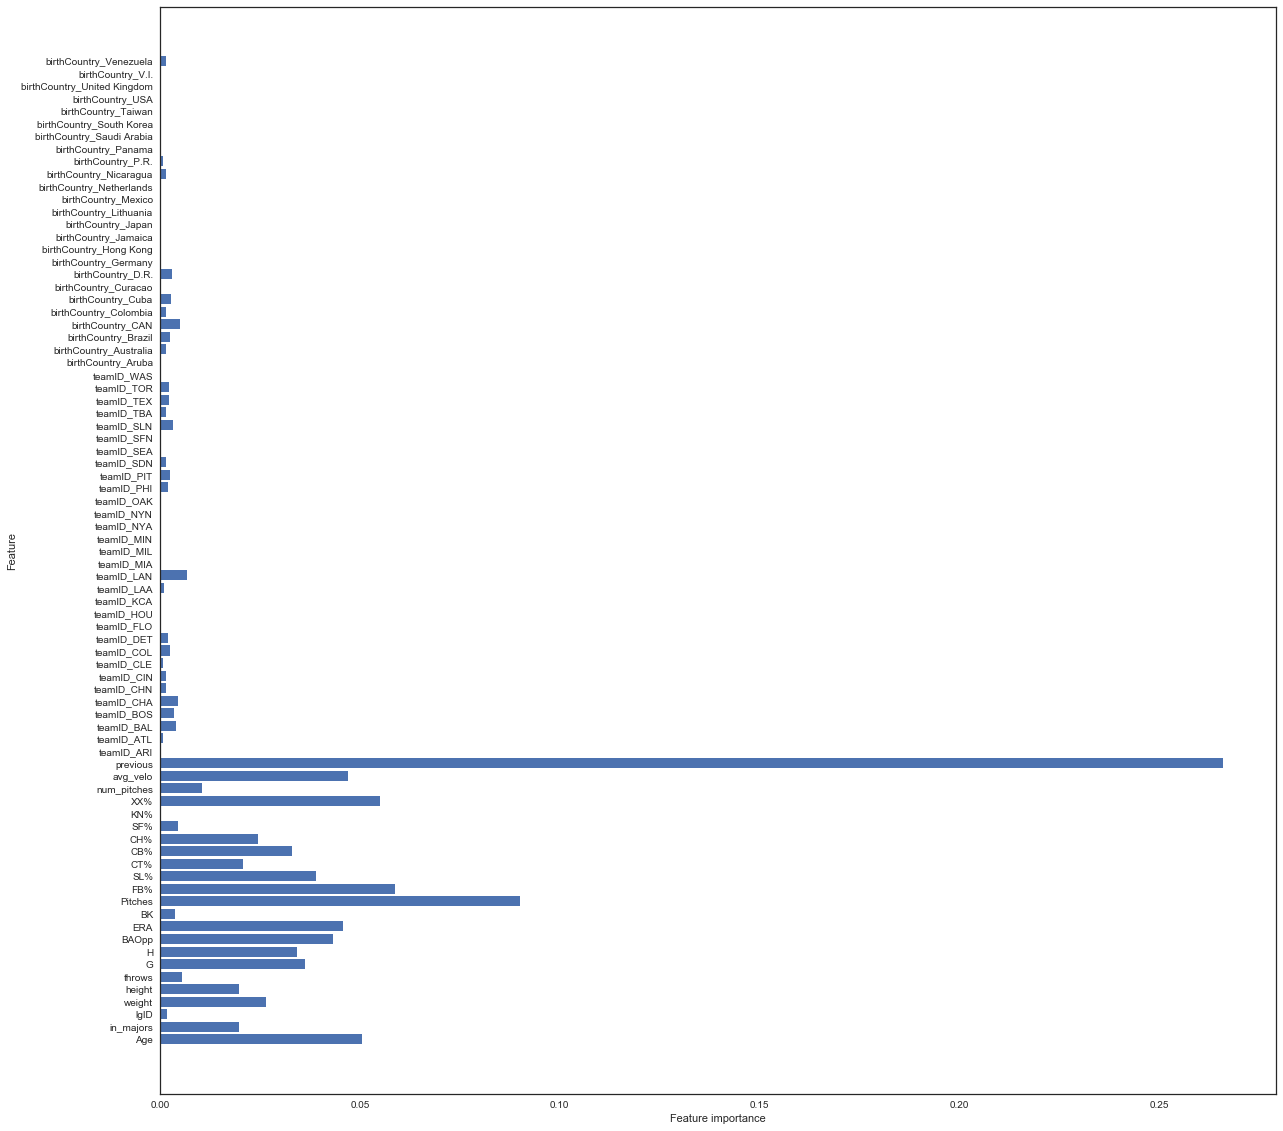

In [172]:
plot_feature_importances(dt_cl)

In [238]:
pitchers.drop(columns = ['teamID', 'lgID', 'birthCountry','BK','throws','num_pitches','SF%', 'KN%','XX%','previous',], inplace = True)

In [204]:
# scaled_df = StandardScaler().fit_transform(pitchers)
# pca = PCA(.90)
# pca_df = pca.fit_transform(scaled_df)

In [362]:
# <h4><center>Visual 8: Principal Component Analysis 'PCA' (another way to determine which components are important)</center></h4>

In [ ]:
# <p>The PCA, as shown below, produces a cumulative sum reflective of each feature's importance at predicting injuries. Inputs filtered to remove any correlated features (i.e., all red listings as shown in visual 4) and then further filtered to keep only the top 90% of predictors. This filtering process reduces our consideration list from 79 to 61 </p>

In [361]:
# print(pca_df.shape)
# print('\n')
# print(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# <p>We will be focusing more on what the Decision Tree above told us, but will also test on what PCA told us.</p>

In [222]:
# train_inj = pca.transform(X_train)
# test_inj = pca.transform(X_test)

<h4><center>A look at our final dataset.</center></h4>
<p>We brought our features down to the 15 shown above. These are the features our models will learn from to try and predict whether a pitcher will get injured the next year (the last column)</p>

In [239]:
pitchers.tail()

,Age,in_majors,weight,height,G,H,BAOpp,ERA,Pitches,FB%,SL%,CT%,CB%,CH%,avg_velo,injured
6914,38,13,255.0,82.0,14.0,47.0,0.353,7.50,536,0.427,0.573,0.000,0.000,0.000,84.13,0
6915,25,1,205.0,75.0,4.0,19.0,0.352,8.31,247,0.644,0.000,0.219,0.113,0.024,86.50,0
6916,37,9,220.0,76.0,53.0,57.0,0.306,4.79,697,0.567,0.211,0.000,0.000,0.222,79.41,1
6917,31,8,225.0,74.0,29.0,204.0,0.313,6.08,2644,0.541,0.244,0.000,0.156,0.060,88.90,1
6918,26,2,190.0,75.0,45.0,30.0,0.208,2.66,639,0.606,0.394,0.000,0.000,0.000,88.92,0


## SHALLOW LEARNING
*In order to effectively run the models, the data is normalized so that every feature is scaled between 0 and 1. The data is split so that 70% is used for training and 30% is then used for testing. The 'injured' column is removed and used as our target to see how well the predictions are at correctly classifying the 'injured' labels.* 

In [240]:
inj = pitchers.injured
pitchers.drop(columns= ["injured"], axis=1, inplace=True)
pitchers = pitchers.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_train, X_test, i_train, i_test = train_test_split(pitchers, inj, test_size = .3)

<h4><center>Naive Bayes Classifier's</center></h4>

In [333]:
# #using multinomial (no negatives)
# mnb_clf = MultinomialNB()
# mnb_clf.fit(X_train, i_train)
# mnb_preds = mnb_clf.predict(X_test)
# mnb_testing_accuracy = accuracy_score(i_test, mnb_preds)
# print('Multinomial Training Accuracy : %4.2f' % mnb_testing_accuracy)

In [336]:
#Gaussian (bec normally distributed)
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, i_train)
gnb_preds = mnb_clf.predict(X_test)
gnb_testing_accuracy = accuracy_score(i_test, gnb_preds)
print('Gaussian Testing Accuracy : %4.2f' % gnb_testing_accuracy)

Gaussian Testing Accuracy : 0.63


<h4><center>Model 1: Decision Tree approach (leveraging a confusion matrix to predict the model's accuracy) </center></h4>

In [317]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10,min_samples_split=10) 
dt_cl = tree_clf.fit(X_train, i_train)
training = dt_cl.score(X_train, i_train)
testing = dt_cl.score(X_test, i_test)
print('Decision Tree Training Accuracy : %4.2f' % training)
print('Decision Tree Testing Accuracy : %4.2f' % testing)

Decision Tree Training Accuracy : 0.80
Decision Tree Testing Accuracy : 0.63


accuracy................. 0.6284
precision................ 0.5019
recall................... 0.5065
F1....................... 0.5042


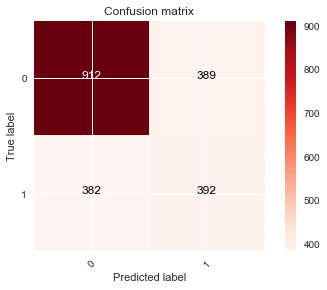

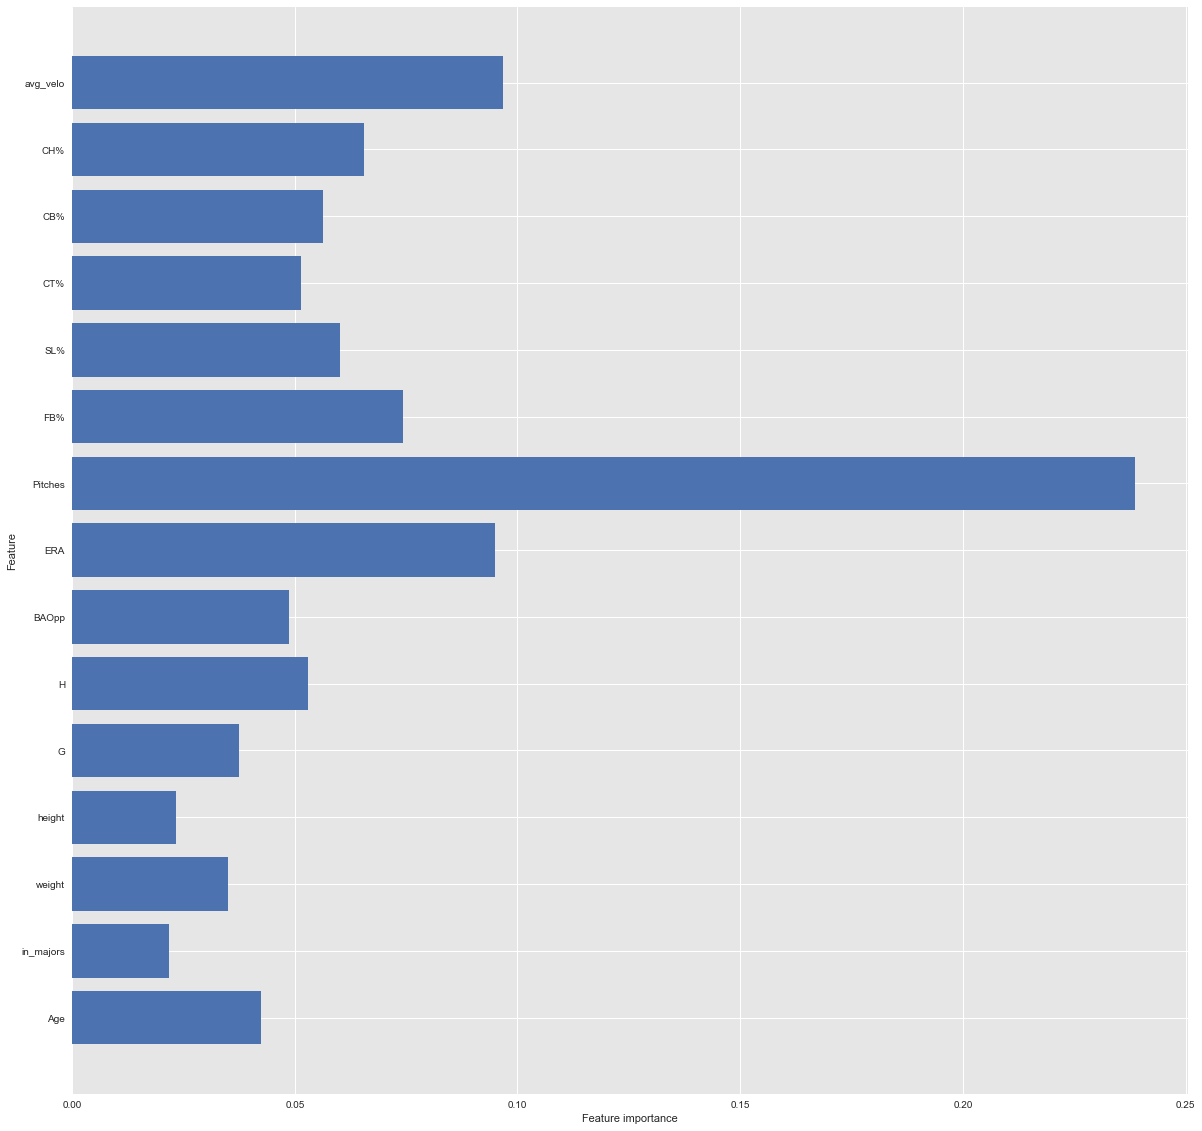

In [318]:
dtm= dt_cl.predict(X_test)
dtmtree = metrics.confusion_matrix(i_test, dtm)
plt.figure()
plot_confusion_matrix(dtmtree, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(tree_clf)

In [ ]:
# <p>Above we see two troubling findings.</p> 
# - 1. The training accuarcy and testing accuracy are way off. This is due to our model overfitting to the specific features in our testing data. If we change parameters, like how deep to go down the tree (ie. how many times to split) we can see those accuracies change. Let's see what happens when we make the tree shallower (less splits)

<p>Changing parameters up a little.</p>

In [340]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5,min_samples_split=5) 
dt_cl = tree_clf.fit(X_train, i_train)
training = dt_cl.score(X_train, i_train)
testing = dt_cl.score(X_test, i_test)
print('Decision Tree Training Accuracy : %4.2f' % training)
print('Decision Tree Testing Accuracy : %4.2f' % testing)

Decision Tree Training Accuracy : 0.68
Decision Tree Testing Accuracy : 0.64


In [ ]:
# A shollower tree has closer accuracy between the training and splitting. This is becasue it is not going as deep into very unique cases that would be unlikely to happen again. The deeper you go, the more unique info 

In [337]:
# - 2. In the confusion Matrix above we can see that the majority of the time our model is predicting that the pitcher will not be injured

<h4><center>Model 2: Random Forest approach (leveraging a confusion matrix to predict the model's accuracy); benefit includes removal of overfitting risk present in the Decision Tree method</center></h4>

In [312]:
rfm = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10)
rftree_m= rfm.fit(X_train, i_train)
training = rfm.score(X_train, i_train)
testing = rfm.score(X_test, i_test)
print('Random Forest Training Accuracy : %4.2f' % training)
print('Random Forest Testing Accuracy : %4.2f' % testing)

Random Forest Training Accuracy : 0.70
Random Forest Testing Accuracy : 0.66


accuracy................. 0.6573
precision................ 0.5634
recall................... 0.3618
F1....................... 0.4406


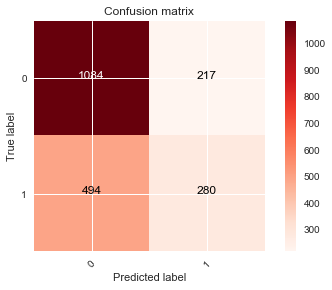

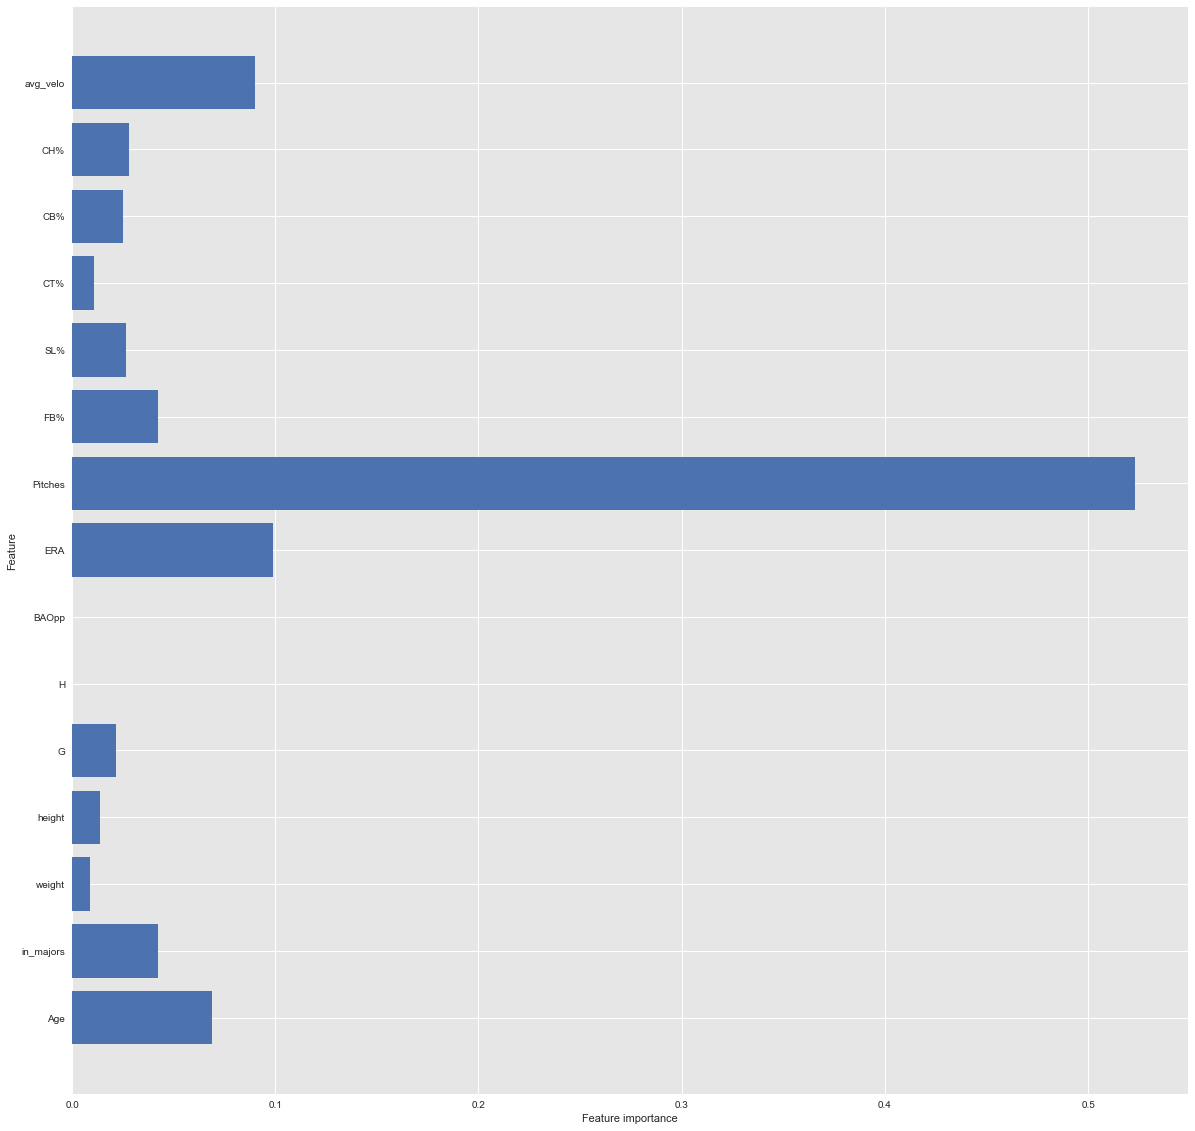

In [313]:
ranf= rfm.predict(X_test)
rfmtree = metrics.confusion_matrix(i_test, ranf)
plt.figure()
plot_confusion_matrix(rfmtree, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(tree_clf)

<h4><center>Model 3: Logistic Regression approach (leveraging a confusion matrix, Receiver Operating Characteristic 'ROC' curve and an Area Under Curve 'AUC' to predict the model's accuracy) </center></h4>

In [296]:
lrm = LogisticRegression(fit_intercept = True, C = 1e12) #1e12
logregm= lrm.fit(X_train, i_train)
training = logregm.score(X_train, i_train)
testing = logregm.score(X_test, i_test)
print('Logistic Regression Training Accuracy : %4.2f' % training)
print('Logistic Regression Testing Accuracy : %4.2f' % testing)

Logistic Regression Training Accuracy : 0.64
Logistic Regression Testing Accuracy : 0.64


accuracy................. 0.6381
precision................ 0.5262
recall................... 0.2984
F1....................... 0.3809


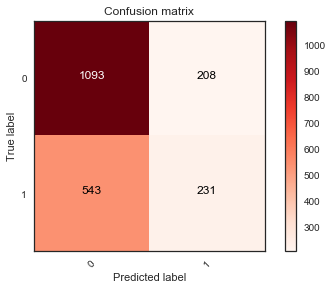

In [297]:
logr= logregm.predict(X_test)
logreg = metrics.confusion_matrix(i_test, logr)
plt.figure()
plot_confusion_matrix(logreg, classes=set(inj),
                      title='Confusion matrix')

plt.show()

AUC: 0.6755924184735654


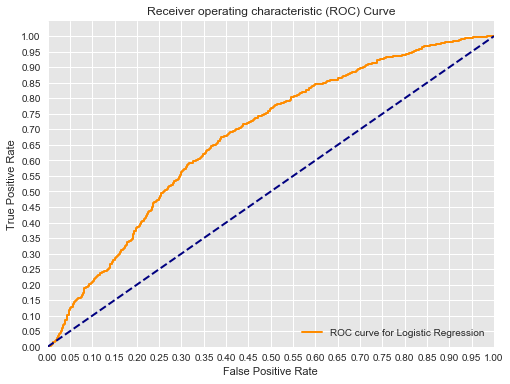

In [299]:
y_score = logregm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Logistic Regression")

<h4><center>Model 4: Support Vector Classifier 'SVC' approach (leveraging a ROC curve to predict the model's accuracy) 
</center></h4>

In [347]:
svc_clf = SVC(kernel='linear')
svc = svc_clf.fit(X_train, i_train)
training = svc.score(X_train, i_train)
testing = svc.score(X_test, i_test)
print('Support Vector Machine Training Accuracy : %4.2f' % training)
print('Support Vector Machine Testing Accuracy : %4.2f' % testing)

Support Vector Machine Training Accuracy : 0.64
Support Vector Machine Testing Accuracy : 0.64


accuracy................. 0.6381
precision................ 0.5324
recall................... 0.2442
F1....................... 0.3348


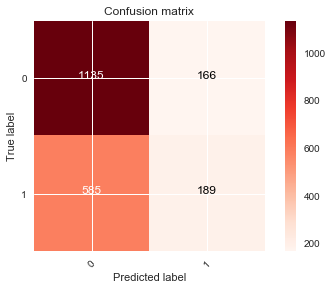

In [348]:
svcm= svc.predict(X_test)
svm = metrics.confusion_matrix(i_test, svcm)
plt.figure()
plot_confusion_matrix(svm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

AUC: 0.6547110451709776


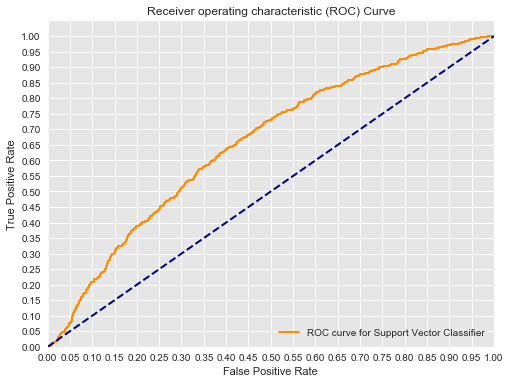

In [343]:
y_score = svc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Support Vector Classifier")

## SYNTHETIC MINORITY OVER SAMPLING TECHNIQUE ('SMOTE') 
*Since the majority of pitchers do not suffer injuries, the aforementioned models leaned heavily towards predicting 'non-injured'. As a result, the SMOTE approach was then used to incorporate dummy rows of 'injured' pitchers into the training set. The model was thus trained to avoid a heavy skew towards a 'non-injured' prediction which would hopefully lead to more accurate findings. Ultimately, the SMOTE approach validated our earlier model findings as the results predicted a similar accuracy both in terms of training and testing results.*

In [365]:
import warnings
warnings.filterwarnings('ignore')

In [366]:

smote = SMOTE(ratio = 1.0)
X_train_sm, i_train_sm = smote.fit_sample(X_train, i_train)

<h4><center>Naive Bayes Classifier's</center></h4>

In [364]:
# #with SMOTE applied
# mnbsm_clf = MultinomialNB()
# mnbsm_clf.fit(X_train_sm, i_train_sm)
# mnbsm_preds = mnbsm_clf.predict(X_test)
# mnbsm_testing_accuracy = accuracy_score(i_test, mnbsm_preds)
# print('Multinomial Training Accuracy : %4.2f' %mnbsm_testing_accuracy)

In [335]:
#with SMOTE applied
gnbsm_clf = GaussianNB()
gnbsm_clf.fit(X_train_sm, i_train_sm)
gnbsm_preds = mnbsm_clf.predict(X_test)
gnbsm_testing_accuracy = accuracy_score(i_test, gnbsm_preds)
print('Gaussian Testing Accuracy : %4.2f' % gnbsm_testing_accuracy)

Gaussian Testing Accuracy : 0.63


<h4><center>Model 1: Decision Tree approach (leveraging a confusion matrix to predict the model's accuracy) </center></h4>

In [319]:
dt_cl = tree_clf.fit(X_train_sm, i_train_sm)
training = dt_cl.score(X_train_sm, i_train_sm)
testing = dt_cl.score(X_test, i_test)
print('Decision Tree Training Accuracy : %4.2f' % training)
print('Decision Tree Testing Accuracy : %4.2f' % testing)

Decision Tree Training Accuracy : 0.79
Decision Tree Testing Accuracy : 0.61


accuracy................. 0.6111
precision................ 0.4847
recall................... 0.6731
F1....................... 0.5635


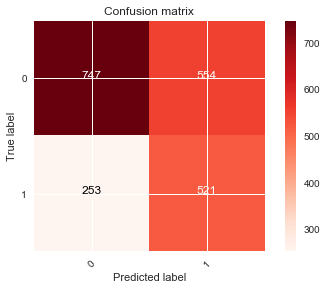

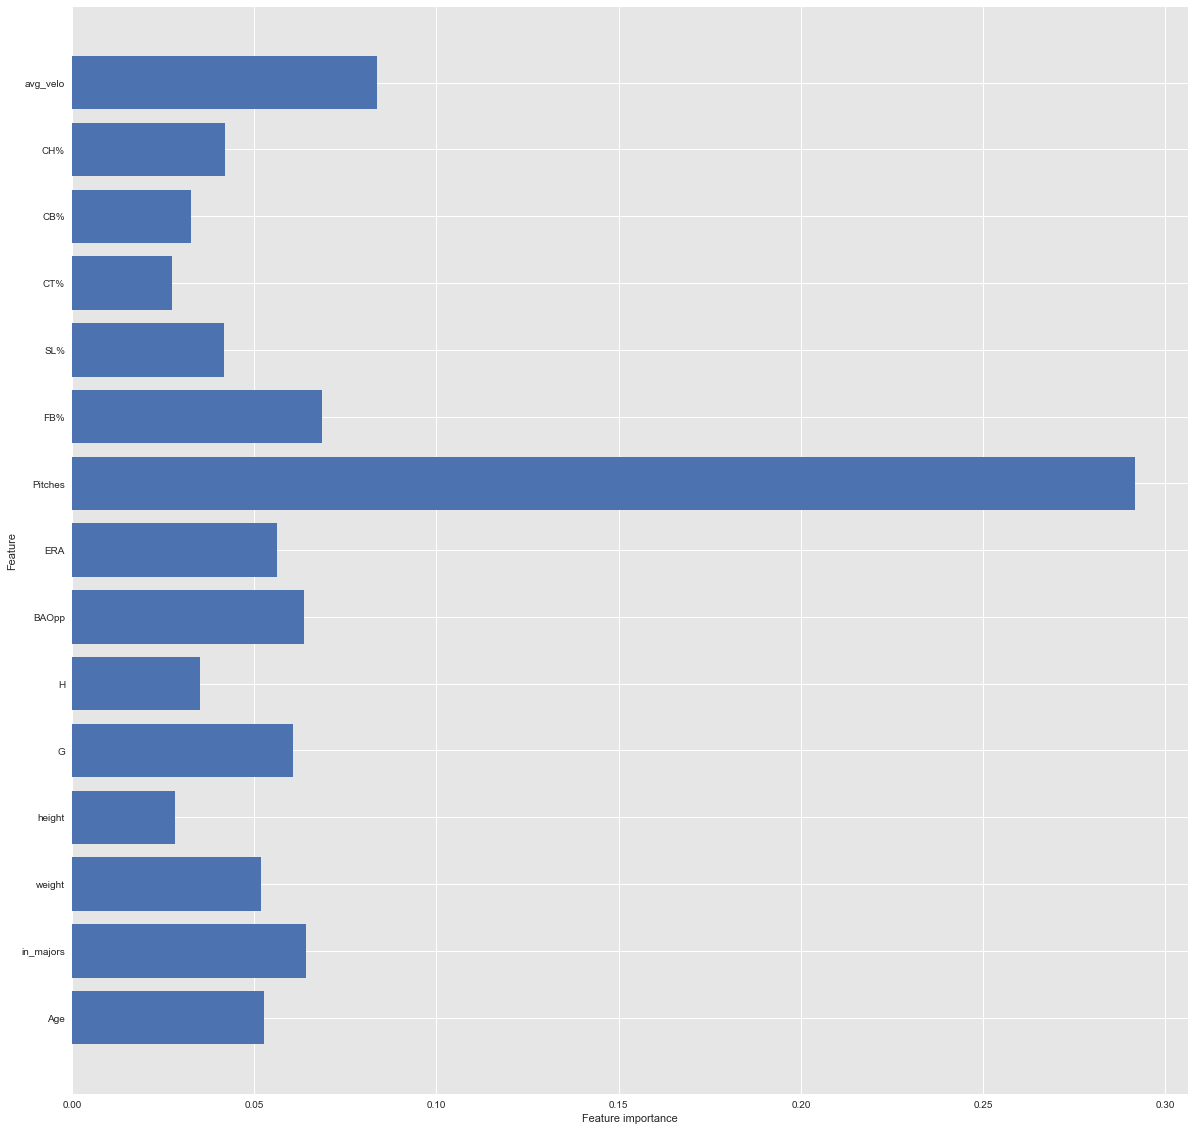

In [320]:
dtm= dt_cl.predict(X_test)
dtmtree = metrics.confusion_matrix(i_test, dtm)
plt.figure()
plot_confusion_matrix(dtmtree, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(tree_clf)

<h4><center>Model 2: Random Forest approach (leveraging a confusion matrix to predict the model's accuracy); benefit includes removal of overfitting risk present in the Decision Tree method</center></h4>

In [314]:
rftree_m= rfm.fit(X_train_sm, i_train_sm)
training = rfm.score(X_train_sm, i_train_sm)
testing = rfm.score(X_test, i_test)
print('Random Forest Training Accuracy : %4.2f' % training)
print('Random Forest Testing Accuracy : %4.2f' % testing)

Random Forest Training Accuracy : 0.69
Random Forest Testing Accuracy : 0.63


accuracy................. 0.6337
precision................ 0.5064
recall................... 0.7145
F1....................... 0.5927


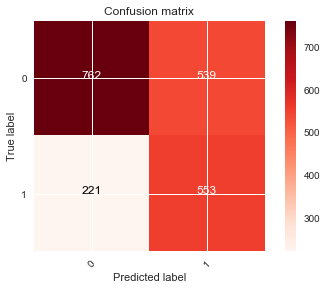

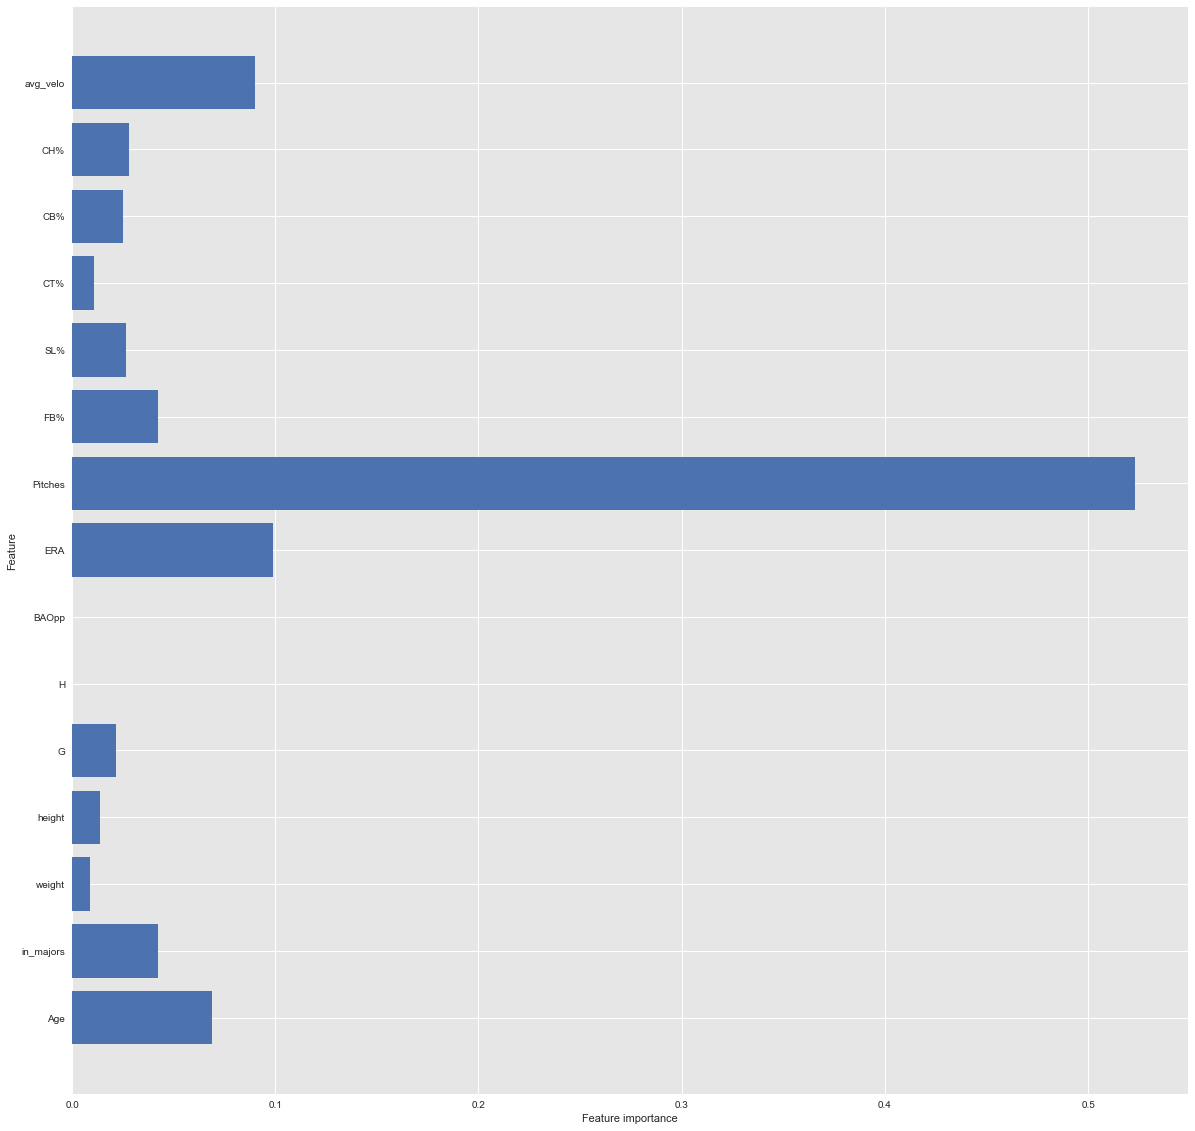

In [315]:
rfm= rfm.predict(X_test)
rfmtree = metrics.confusion_matrix(i_test, rfm)
plt.figure()
plot_confusion_matrix(rfmtree, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(tree_clf)

<h4><center>Model 3: Logistic Regression approach (leveraging a confusion matrix, Receiver Operating Characteristic 'ROC' curve and an Area Under Curve 'AUC' to predict the model's accuracy) </center></h4>

In [304]:
logregm= lrm.fit(X_train_sm, i_train_sm)
training = logregm.score(X_train_sm, i_train_sm)
testing = logregm.score(X_test, i_test)
print('Logistic Regression Training Accuracy : %4.2f' % training)
print('Logistic Regression Testing Accuracy : %4.2f' % testing)

Logistic Regression Training Accuracy : 0.64
Logistic Regression Testing Accuracy : 0.64


accuracy................. 0.6352
precision................ 0.5087
recall................... 0.6434
F1....................... 0.5682


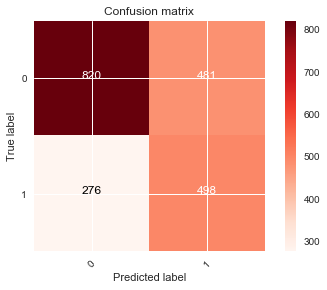

In [305]:
logr= logregm.predict(X_test)
logreg = metrics.confusion_matrix(i_test, logr)
plt.figure()
plot_confusion_matrix(logreg, classes=set(inj),
                      title='Confusion matrix')

plt.show()

AUC: 0.6752587455088215


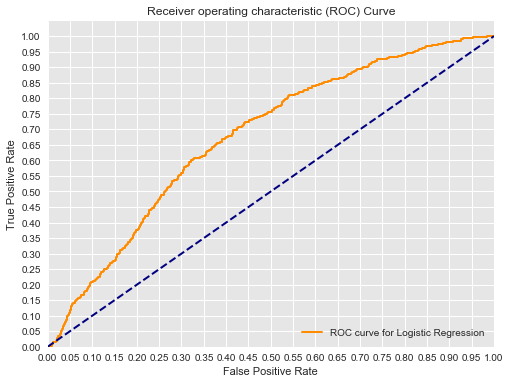

In [306]:
y_score = logregm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Logistic Regression")

<h4><center>Model 4: Support Vector Classifier 'SVC' approach (leveraging a ROC curve to predict the model's accuracy) 
</center></h4>

In [344]:
svc = svc_clf.fit(X_train_sm, i_train_sm)
training = svc.score(X_train_sm, i_train_sm)
testing = svc.score(X_test, i_test)
print('Support Vector Machine Training Accuracy : %4.2f' % training)
print('Support Vector Machine Testing Accuracy : %4.2f' % testing)

Support Vector Machine Training Accuracy : 0.63
Support Vector Machine Testing Accuracy : 0.64


accuracy................. 0.6381
precision................ 0.5118
recall................... 0.6447
F1....................... 0.5706


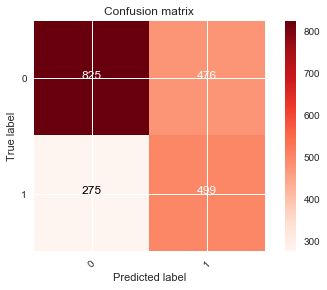

In [346]:
svcm= svc.predict(X_test)
svm = metrics.confusion_matrix(i_test, svcm)
plt.figure()
plot_confusion_matrix(svm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

AUC: 0.6754573603687881


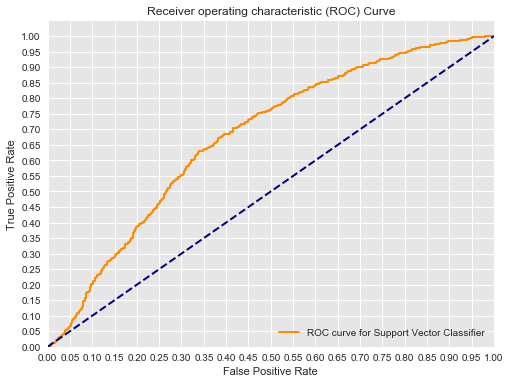

In [345]:
y_score = svc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Support Vector Classifier")

In [ ]:
## DEEP LEARNING
# *To further predict whether pitchers will be injured, a Multi Layer Perceptron 'MLP' is generated. This model analyzes the inputted data by testing it through various nodes and determining how much weight to assign to each feature.*

In [ ]:
# <!-- <h4><center>MLP 1: Summary of data inputs and parameters</center></h4> -->

In [349]:
y_train = keras.utils.to_categorical(i_train, 2)
y_test = keras.utils.to_categorical(i_test, 2)

In [354]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(15, )))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# <h4><center>MLP 2: Outcome of each model run-through</center></h4>

<img src='https://cdn.theatlantic.com/assets/media/img/mt/2014/04/pitcher_injury/lead_large.jpg'/>

## CONCLUSION
*Taking into account data from 2009-present day, this report tested against a classifier and four models in shallow learning, as well as tested the four models with the SMOTE approach. The overall prediction identified velocity, pitch count, earned run average and the pitcher's age as key determinants for injury risk. The best models determined with a 64% accuracy if a pitcher would be injured in the following season.  If used correctly, this modeling approach can help teams determine if it is safe to sign a pitcher to a long term deal or if they need to give a pitcher more rest throughout the season.*

## NEXT STEPS
- Predict the amount of days an injured pitcher would be on the disabled-list
- Incorporate playoff and minor league data
- Determine whether a specific team is more prone to injury and hypothesize reasoning